In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

## Conceptual exercises

#### Non-linear separation 

__1. (15 points) Generate a simulated two-class data set with 100 observations and two features in which there is a visible (clear) but still non-linear separation between the two classes. Show that in this setting, a support vector machine with a radial kernel will outperform a support vector classifier (a linear kernel) on the training data. Which technique performs best on the test data? Make plots and report training and test error rates in order to support your conclusions.__

In [2]:
# Generating random data: 100 obervations of 2 features and divided into two classes 
np.random.seed(5)

X = np.random.randn(100,2)
y = np.repeat([1,-1], 50)

X[y == -1] = X[y == -1]+1

In [3]:
# a function to draw a nice plot of an SVM; adapted from: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab15-py.html
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=24, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

Text(0, 0.5, 'X2')

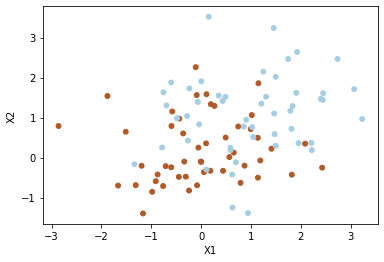

In [4]:
# Plot to see whether the classes are linearly separable

plt.scatter(X[:,0], X[:,1], s=24, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

- Not linear, fit the support vector classifier

##### linear kernel

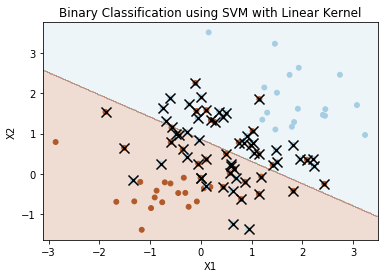

Number of support vectors:  64


In [5]:
svc = SVC(C=1, kernel='linear')
svc.fit(X, y)
plt.title("Binary Classification using SVM with Linear Kernel")
plot_svc(svc, X, y)

##### radial kernel

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=2)

In [7]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],
                     'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)
clf.best_params_

C:\Users\Yoojin\Anaconda1\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 1, 'gamma': 1}

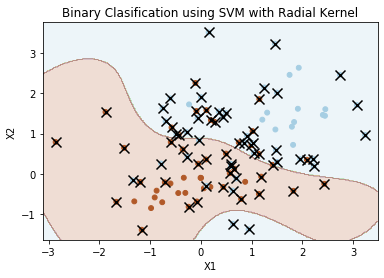

Number of support vectors:  73


In [8]:
svc2 = SVC(C=1, kernel='rbf', gamma = 1)
svc2.fit(X, y)
plt.title("Binary Clasification using SVM with Radial Kernel")
plot_svc(svc2, X, y)

##### linear vs radial kernels

In [9]:
svm_radial = SVC(C = 1, kernel = 'rbf', gamma = 1)
svc = SVC(kernel = 'linear')

svm_radial.fit(X_train, y_train)
svc.fit(X_train, y_train)

print('The train error for svm (linear):', 1 - svc.score(X_train, y_train))
print('The train error for svm (radial):', 1 - svm_radial.score(X_train, y_train))

print('The test error for svm (linear):', 1 - svc.score(X_test, y_test))
print('The test error for svm (radial):', 1 - svm_radial.score(X_test, y_test))

print('The train accuracy for svm (linear):', accuracy_score(svc.predict(X_train), y_train))
print('The train accuracy for svm (radial):', accuracy_score(svm_radial.predict(X_train), y_train))

print('The test accuracy for svm (linear):', accuracy_score(svc.predict(X_test), y_test))
print('The test accuracy for svm (radial):', accuracy_score(svm_radial.predict(X_test), y_test))

The train error for svm (linear): 0.21999999999999997
The train error for svm (radial): 0.18000000000000005
The test error for svm (linear): 0.31999999999999995
The test error for svm (radial): 0.30000000000000004
The train accuracy for svm (linear): 0.78
The train accuracy for svm (radial): 0.82
The test accuracy for svm (linear): 0.68
The test accuracy for svm (radial): 0.7


- A support vector machine with radial kernel have lower error rates and higher accuracy scores on both training and test sets. 
<br>

- This result confirms that when data is not linearly separable, svm with radial kernel does better job than linear kernel. 

#### SVM vs. logistic regression 

We have seen that we can fit an SVM with a non-linear kernel in order to perform classification using a non-linear decision boundary. We will now see that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features. Your goal here is to compare different approaches to estimating non-linear decision boundaries, and thus assess the benefits and drawbacks of each.

__2. (5 points) Generate a data set with $n = 500$ and $p = 2$, such that the observations belong to two classes with some overlapping, non-linear boundary between them__

In [10]:
np.random.seed(1234)

x1 = np.random.uniform(-1, 1, 500)
x2 = np.random.uniform(-1, 1, 500)
X = np.column_stack((x1, x2))

e = np.random.normal(0, 1, 500)

y = x1 + x1**2 + x2 + x2**2 + e

prob = np.exp(y) / (1 + np.exp(y))
yes = prob >= 0.5
no = prob < 0.5

__3. (5 points) Plot the observations with colors according to their class labels ($y$). Your plot should display $X_1$ on the $x$-axis and $X_2$ on the $y$-axis.__

Text(0, 0.5, 'X2')

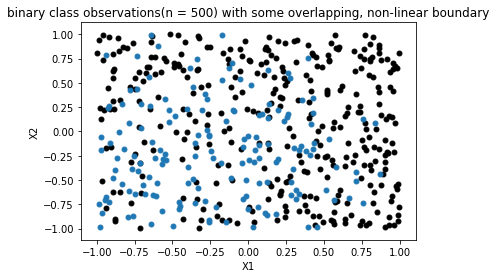

In [11]:
plt.scatter(x1[yes], x2[yes], s=24, color = 'black')
plt.scatter(x1[no], x2[no], s=24)
plt.title("binary class observations(n = 500) with some overlapping, non-linear boundary")
plt.xlabel('X1')
plt.ylabel('X2')

__4. (5 points) Fit a logistic regression model to the data, using $X_1$ and $X_2$ as predictors.__

In [12]:
X = np.column_stack((x1, x2))

logit = LogisticRegression().fit(X, yes)

__5. (5 points) Obtain a predicted class label for each observation based on the logistic model previously fit. Plot the observations, colored according to the predicted class labels (the predicted decision boundary should look linear).__

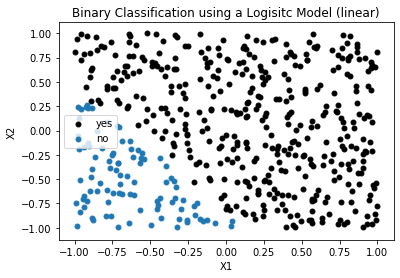

In [13]:
logit_pred = logit.predict(X)

plt.scatter(x1[logit_pred], x2[logit_pred], s=24, color = 'black')
plt.scatter(x1[~logit_pred], x2[~logit_pred], s=24)#
plt.title("Binary Classification using a Logisitc Model (linear)")
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(['yes', 'no'])

__6. (5 points) Now fit a logistic regression model to the data, but this time using some non-linear function of both $X_1$ and $X_2$ as predictors (e.g. $X_1^2, X_1 \times X_2, \log(X_2)$, and so on).__

In [14]:
X_new = np.column_stack((x1**2, x2))

logit2 = LogisticRegression().fit(X**2, yes)

__7. (5 points) Now, obtain a predicted class label for each observation based on the fitted model with non-linear transformations of the $X$ features in the previous question. Plot the observations, colored according to the new predicted class labels from the non-linear model (the decision boundary should now be obviously non-linear). If it is not, then repeat earlier steps until you come up with an example in which the predicted class labels and the resultant decision boundary are clearly non-linear.__

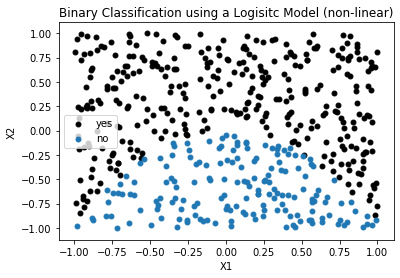

In [15]:
logit_pred2 = logit2.predict(X_new)

plt.legend(['yes', 'no'])
plt.scatter(x1[logit_pred2], x2[logit_pred2], s=24, color = 'black')
plt.scatter(x1[~logit_pred2], x2[~logit_pred2], s=24)
plt.title("Binary Classification using a Logisitc Model (non-linear)")
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(['yes', 'no'])

__8. (5 points) Now, fit a support vector classifier (linear kernel) to the data with original $X_1$ and $X_2$ as predictors. Obtain a class prediction for each observation. Plot the observations, colored according to the predicted class labels.__

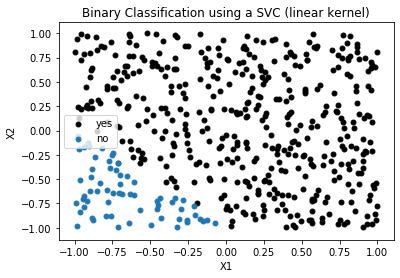

In [16]:
svc = svc.fit(X, yes)
svc_pred = svc.predict(X)

plt.legend(['yes', 'no'])
plt.scatter(x1[svc_pred], x2[svc_pred], s=24, color = 'black')
plt.scatter(x1[~svc_pred], x2[~svc_pred], s=24)
plt.title("Binary Classification using a SVC (linear kernel)")
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(['yes', 'no'])

__9. (5 points) Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each observation. Plot the observations, colored according to the predicted class labels.__

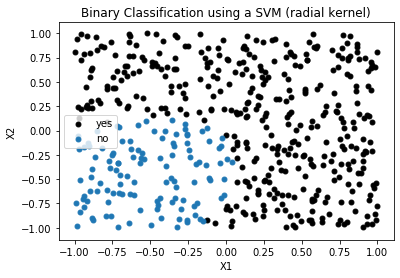

In [17]:
radial = svm_radial.fit(X, yes)
radial_pred = radial.predict(X)

plt.legend(['yes', 'no'])
plt.scatter(x1[radial_pred], x2[radial_pred], s=24, color = 'black')
plt.scatter(x1[~radial_pred], x2[~radial_pred], s=24)
plt.title("Binary Classification using a SVM (radial kernel)")
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(['yes', 'no'])

__10. (5 points) Discuss your results and specifically the tradeoffs between estimating non-linear decision boundaries using these two different approaches.__

In [18]:
print('Accuracy for logistic (linear):', accuracy_score(logit.predict(X), yes))
print('Accuracy for logistic (non-linear):', accuracy_score(svm_radial.predict(X), yes))

print('Accuracy for svm (linear):', accuracy_score(svc.predict(X), yes))
print('Accuracy for svm (radial):', accuracy_score(radial.predict(X), yes))
      

Accuracy for logistic (linear): 0.716
Accuracy for logistic (non-linear): 0.73
Accuracy for svm (linear): 0.706
Accuracy for svm (radial): 0.73


- When the decision boundary is not linear, a SVM with radial kernel performs better than a SVM with linear kernel as expected. A non-linear logistic's performance is on par with that of radial svm. Although both models (SVM with radial and non-linear logistic regression) perform equally well, logistic regression is better in terms of its interpretability of results. 

#### Tuning cost

In class we learned that in the case of data that is just barely linearly separable, a support vector classifier with a small value of `cost` that misclassifies a couple of training observations may perform better on test data than one with a huge value of `cost` that does not misclassify any training observations. You will now investigate that claim.

__11. (5 points) Generate two-class data with $p=2$ in such a way that the classes are just barely linearly separable.__

Text(0, 0.5, 'X2')

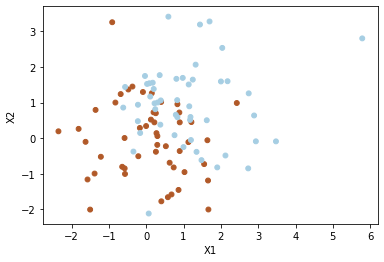

In [19]:
np.random.seed(55)

X = np.random.randn(100,2)
y = np.repeat([1,-1], 50)

X[y == -1] = X[y == -1]+1

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state = 3)

plt.scatter(X[:,0], X[:,1], s=24, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

__12. (5 points) Compute the cross-validation error rates for support vector classifiers with a range of `cost` values. How many training errors are made for each value of `cost` considered, and how does this relate to the cross-validation errors obtained?__

In [20]:
cost = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 100]
result = []
for c in cost: 
    svc = SVC(kernel = 'linear', C = c, random_state = 3)
    svc.fit(X_train, y_train) 
    pred = svc.predict(X_train)
    num_err  = len(y_train) - np.sum(y_train == pred)
    train_err = 1 - svc.score(X_train, y_train)
    cv_err = 1 - cross_val_score(svc, X_train, y_train, cv = 10).mean()
    num_vectors = svc.support_.size
    
    result.append([c, num_err, train_err, cv_err, num_vectors])

df = pd.DataFrame(data = np.asarray(result), 
                  columns = ['cost value', 'training error #', 'training error', 'cv error', 'support vector #'])

df

,cost value,training error #,training error,cv error,support vector #
0,0.00001,19.0,0.38,0.358333,50.0
1,0.00010,19.0,0.38,0.358333,50.0
2,0.00100,19.0,0.38,0.358333,50.0
3,0.01000,10.0,0.20,0.175000,48.0
4,0.10000,12.0,0.24,0.208333,32.0
5,1.00000,9.0,0.18,0.208333,27.0
6,5.00000,8.0,0.16,0.158333,27.0
7,10.00000,8.0,0.16,0.158333,27.0
8,100.00000,7.0,0.14,0.158333,26.0


In [21]:
# Select the optimal C parameter by cross-validation
tuned_parameters = [{'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 100, 1000]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)

clf.best_params_

C:\Users\Yoojin\Anaconda1\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 5}

- As the above table shows, as `c` increrases, the number of support vectors decrease, meaning margin is more restricted. 
<br>

- Generally, training error and cv error decrease as `c` increase; however after the optimal value of `c`, cv error rate remains constant. 


__13. (5 points) Generate an appropriate test data set, and compute the test errors corresponding to each of the values of `cost` considered. Which value of `cost` leads to the fewest test errors, and how does this compare to the values of `cost` that yield the fewest training errors and the fewest cross-validation errors?__

In [22]:
tuned_parameters = [{'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 100, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X_test, y_test)

clf.best_params_

C:\Users\Yoojin\Anaconda1\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 1e-05}

In [23]:
cost = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 100]
result = []
for c in cost: 
    svc = SVC(kernel = 'linear', C = c, random_state = 3)
    svc.fit(X_test, y_test) 
    pred = svc.predict(X_test)
    num_err  = len(y_test) - np.sum(y_test == pred)
    test_err = 1 - svc.score(X_test, y_test)
    cv_err = 1 - cross_val_score(svc, X_train, y_train, cv = 10).mean()
    num_vectors = svc.support_.size
    
    result.append([c, num_err, test_err, cv_err, num_vectors])

df = pd.DataFrame(data = np.asarray(result), 
                  columns = ['cost value', 'test error #', 'test error','cv error', 'support vector #'])

df

,cost value,test error #,test error,cv error,support vector #
0,0.00001,17.0,0.34,0.358333,50.0
1,0.00010,17.0,0.34,0.358333,50.0
2,0.00100,17.0,0.34,0.358333,50.0
3,0.01000,17.0,0.34,0.175000,50.0
4,0.10000,17.0,0.34,0.208333,42.0
5,1.00000,14.0,0.28,0.208333,36.0
6,5.00000,14.0,0.28,0.158333,35.0
7,10.00000,14.0,0.28,0.158333,35.0
8,100.00000,14.0,0.28,0.158333,35.0


__14. (5 points) Discuss your results.__

- Based on the observed result, the test error reaches its minimum when `c` = 1. 
<br>

- It is lower than the cost value that yielded the lowest errors on the training set (c = 100) and the lowest cv error on the test set (`c` = 100)
<br>

- According to the best parameter search on the test set, however, c = 0.00001 is enough to optimize the function, meaning that smaller cost is suitable enough. 
<br>

- This contrasts with result from the best hyperparameter search on the training set. 
<br>

- The cost parameter trades off correct classification of training examples against maximization of the decision function's margin. For larger values of `c`, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower `c` will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. 
<br>

- In this context where classes are just barely linearly separable, such discrepancy in the best `c` values in the test and training sets (with training set's `c` being higher, yielding smaller margin) indicates that there's a high likelihood of overfitting. 

### Application: Predicting attitudes towards racist college professors

In [24]:
train = pd.read_csv('data/gss_train.csv')
test = pd.read_csv('data/gss_test.csv')

x_train = train.drop(columns = 'colrac')
x_test = test.drop(columns = 'colrac')
y_train = train['colrac']
y_test = test['colrac']

__15. (5 points) Fit a support vector classifier to predict colrac as a function of all available predictors, using 10-fold cross-validation to find an optimal value for `cost`. Report the CV errors associated with different values of cost, and discuss your results.__

In [25]:
cost = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5]
result = []
for c in cost: 
    svc = SVC(kernel = 'linear', C = c, random_state = 3)
    svc.fit(x_train, y_train) 
    train_err = 1 - svc.score(x_train, y_train)
    cv_err = 1 - cross_val_score(svc, x_train, y_train, cv = 10).mean()
    num_vectors = svc.support_.size
    
    result.append([c, train_err, cv_err, num_vectors])

df = pd.DataFrame(data = np.asarray(result), 
                  columns = ['cost value', 'train error', 'cv error','support vector #'])

df

,cost value,train error,cv error,support vector #
0,0.00001,0.474679,0.474678,1407.0
1,0.00010,0.299122,0.303107,1339.0
2,0.00100,0.226874,0.239674,978.0
3,0.01000,0.189061,0.205949,813.0
4,0.10000,0.180959,0.203945,705.0
5,1.00000,0.180959,0.205958,676.0
6,5.00000,0.181634,0.205958,672.0


In [46]:
tuned_parameters = [{'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5]}]
clf0 = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
clf0.fit(x_train, y_train)

clf0.best_params_          

{'C': 0.1}

In [47]:
# tuned
svc = clf0.best_estimator_

- Both cv and train errors essentially don't further decrease after `c` reraches its optimal value at 0.1.

__16. (15 points) Repeat the previous question, but this time using SVMs with radial and polynomial basis kernels, with different values for `gamma` and `degree` and `cost`. Present and discuss your results (e.g., fit, compare kernels, cost, substantive conclusions across fits, etc.)__

#### radial

In [27]:
cost = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5]
result = []
for c in cost: 
    svc = SVC(kernel = 'rbf', C = c, random_state = 3)
    svc.fit(x_train, y_train) 
    train_err = 1 - svc.score(x_train, y_train)
    cv_err = 1 - cross_val_score(svc, x_train, y_train, cv = 10).mean()
    num_vectors = svc.support_.size
    
    result.append([c, train_err, cv_err, num_vectors])

df = pd.DataFrame(data = np.asarray(result), 
                  columns = ['cost value', 'train error', 'cv error','support vector #'])

df

,cost value,train error,cv error,support vector #
0,0.00001,0.474679,0.474678,1406.0
1,0.00010,0.474679,0.474678,1406.0
2,0.00100,0.474679,0.474678,1424.0
3,0.01000,0.474679,0.474678,1444.0
4,0.10000,0.465901,0.473997,1446.0
5,1.00000,0.026334,0.272833,1374.0
6,5.00000,0.000000,0.264113,1388.0


In [28]:
gamma = [0.001, 0.01, 0.1, 1, 10, 100]
result = []
for g in gamma: 
    svc = SVC(kernel = 'rbf', gamma = g, random_state = 3)
    svc.fit(x_train, y_train) 
    train_err = 1 - svc.score(x_train, y_train)
    cv_err = 1 - cross_val_score(svc, x_train, y_train, cv = 10).mean()
    num_vectors = svc.support_.size
    
    result.append([g, train_err, cv_err, num_vectors])

df = pd.DataFrame(data = np.asarray(result), 
                  columns = ['gamma', 'train error', 'cv error','support vector #'])

df

,gamma,train error,cv error,support vector #
0,0.001,0.203916,0.235707,990.0
1,0.010,0.081026,0.246490,1192.0
2,0.100,0.000000,0.469943,1481.0
3,1.000,0.000000,0.474678,1481.0
4,10.000,0.000000,0.474678,1481.0
5,100.000,0.000000,0.474678,1481.0


In [29]:
tuned_parameters = {'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5],
                   'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(x_train, y_train)

clf.best_params_

{'C': 5, 'gamma': 0.001}

In [30]:
# tuned
rbf = clf.best_estimator_

- `gamma` defines how far the influece of a single training example reaches, with low values meaning far. Too large `gamma` means that the radius of the area of influence of the support vectors includes the support vector itself and no amount of regularization with `c` will be able to prevent overfitting. 
- When it is too small, the model cannot capture the bigger picture of the data. The resulting model will be similar to a linear model with a set of hyperplanes that separate the centers of high density of any pair of two classes. 
<br>

- The cv error and the number of support vectors reach minimum when `gamma` = 0.01, but the training error is actually noticeably higher; it might be to do with the characteristics of features?? I am not sure... 
<br>

- Based on the above result, the training and cv errors reach minimum when c = 5. It is larger than `c` of the tuned linear SVM (0.1)
- It might be partly due to the fact that with the optimal value of `gamma`, it is not as necessary to regularize by enforcing a larger margin. 

#### polynomial

In [33]:
degree = [1,2,3,4,5]
result = []
for d in degree: 
    svc = SVC(kernel = 'poly', degree = d, random_state = 3)
    svc.fit(x_train, y_train) 
    train_err = 1 - svc.score(x_train, y_train)
    cv_err = 1 - cross_val_score(svc, x_train, y_train, cv = 10).mean()
    num_vectors = svc.support_.size
    
    result.append([d, train_err, cv_err, num_vectors])

df = pd.DataFrame(data = np.asarray(result), 
                  columns = ['degree', 'train error', 'cv error','support vector #'])

df


,degree,train error,cv error,support vector #
0,1.0,0.185010,0.201890,781.0
1,2.0,0.104659,0.225599,661.0
2,3.0,0.000000,0.262054,621.0
3,4.0,0.000000,0.262721,631.0
4,5.0,0.000000,0.270158,594.0


In [34]:
cost = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5]
result = []
for c in cost: 
    svc = SVC(kernel = 'poly', C = c, random_state = 3)
    svc.fit(x_train, y_train) 
    train_err = 1 - svc.score(x_train, y_train)
    cv_err = 1 - cross_val_score(svc, x_train, y_train, cv = 10).mean()
    num_vectors = svc.support_.size
    
    result.append([c, train_err, cv_err, num_vectors])

df = pd.DataFrame(data = np.asarray(result), 
                  columns = ['cost value', 'train error', 'cv error','support vector #'])

df

,cost value,train error,cv error,support vector #
0,0.00001,0.206617,0.233689,1008.0
1,0.00010,0.174207,0.207976,806.0
2,0.00100,0.138420,0.217427,696.0
3,0.01000,0.074274,0.216829,659.0
4,0.10000,0.007427,0.257310,628.0
5,1.00000,0.000000,0.262054,621.0
6,5.00000,0.000000,0.262054,621.0


In [35]:
gamma = [0.001, 0.01, 0.1, 1, 10, 100]
result = []
for g in gamma: 
    svc = SVC(kernel = 'poly', gamma = g, random_state = 3)
    svc.fit(x_train, y_train) 
    train_err = 1 - svc.score(x_train, y_train)
    cv_err = 1 - cross_val_score(svc, x_train, y_train, cv = 10).mean()
    num_vectors = svc.support_.size
    
    result.append([g, train_err, cv_err, num_vectors])

df = pd.DataFrame(data = np.asarray(result), 
                  columns = ['gamma', 'train error', 'cv error','support vector #'])

df

,gamma,train error,cv error,support vector #
0,0.001,0.165429,0.205255,774.0
1,0.010,0.001350,0.262045,632.0
2,0.100,0.000000,0.260703,622.0
3,1.000,0.000000,0.262049,620.0
4,10.000,0.000000,0.262049,621.0
5,100.000,0.000000,0.262049,622.0


In [39]:
# tuned_parameters = {'degree': [1,2,3,4,5],
#                     'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5],
#                    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
# clf2 = GridSearchCV(SVC(kernel='poly'), tuned_parameters, cv=10, scoring='accuracy')
# clf2.fit(x_train, y_train)

# clf2.best_params_

- Since it took too long to fine-tune, I picked optimal parameters based on three tables above (`d` = 1, given combination of low cv and training errors; `c` = 1 also based on the low values of cv and training errors, and `gamma` = 0.01 considering the small difference between the combination of training and cv errors when `gamma` = 0.01 and when `gamma` = 0.01, given slightly larger number of corresponding support vectors)

In [49]:
#tuned 
poly = SVC(kernel = 'poly', degree = 1, C = 1, gamma = 0.01)
poly.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=0.01, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### on the test set

In [50]:
rbf_err = 1 - rbf.score(x_test, y_test)
print('The test error rate for the tuned radial SVM:', rbf_err)

The test error rate for the tuned radial SVM: 0.19675456389452328


In [51]:
poly_err = 1 - poly.score(x_test, y_test)
print('The test error rate for the tuned poly SVM:', poly_err)

The test error rate for the tuned poly SVM: 0.19675456389452328


In [48]:
svc_err = 1 - svc.score(x_test, y_test)
print('The test error rate for the tuned SVC:', svc_err)

The test error rate for the tuned SVC: 0.2190669371196755


- The linear kernel's test error rate is slightly higher than those of radial and polynomial kernels.
- It is not surprising since more flexible decision boundaries generated by polynomial and radial kernels affords better fit. 
<br>

- Although polynomial kernel generates a much more flexible decision boundary than the linear kernel, it takes a way too long time (more than 2 hours) to fine-tune the model; assuming that the optimal degree is indeed 1, such extra step is unnecessary.
<br>

- Considering the computational efficiency along with the test error rates of each model, I think the radial kernel is the most efficient. The test error rate for radial and poly are essentially the same (with the degree being 1; here I am perplexed by the fact that different `gamma` and `c` of each tuned model are not yielding different test errors though...) 
<br>

- Generally, test error rates are relatively similar across three different kernels, suggesting that data might not be highly non-linear
<br>

- In sum, given the radial kernel's more flexibility yielding lower test error rate than that of the linear kernel and its higher computational efficiency when compared to that of the polynomial kernel, I think the radial kernel is the most optimal choice. 